In [26]:
import geopandas as gpd
import pandas as pd
import gudhi
import matplotlib.pyplot as plt
gudhi.persistence_graphical_tools._gudhi_matplotlib_use_tex=False

In [27]:
SHAPE_PATH = 'dataset/shapefiles/001-alameda.shp'
VOTES_PATH = 'dataset/final-results/001-alameda.csv'

shapes_gdf = gpd.read_file(SHAPE_PATH)
votes_df = pd.read_csv(VOTES_PATH)

In [28]:
shapes_gdf.columns.values
shapes_gdf = shapes_gdf.set_index('pct16').drop('area', axis=1)
shapes_gdf['centroid'] = shapes_gdf.to_crs('epsg:3785').centroid.to_crs(shapes_gdf.crs)
shapes_gdf = shapes_gdf.drop('geometry', axis=1)

In [29]:
votes_df = votes_df.set_index('pct16')[['pres_clinton', 'pres_trump']]
gdf = shapes_gdf.join(votes_df)
gdf = gdf[gdf['pres_clinton'] > gdf['pres_trump']]

In [30]:
points = [[x, y] for x, y in zip(shapes_gdf['centroid'].x, shapes_gdf['centroid'].y)]

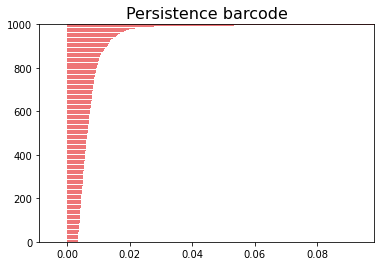

In [32]:
rips_complex = gudhi.RipsComplex(points)
simplex_tree = rips_complex.create_simplex_tree()

diag = simplex_tree.persistence()
pers_file = 'rips.pers'
simplex_tree.write_persistence_diagram(pers_file)

gudhi.plot_persistence_barcode(diag)
plt.show()

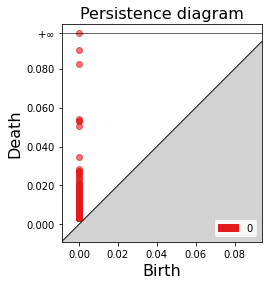

In [33]:
ax = gudhi.plot_persistence_diagram(
    persistence_file=pers_file,
    legend=True)
ax.set_aspect("equal")
plt.show()

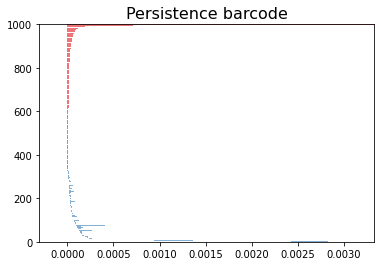

In [44]:
alpha_complex = gudhi.AlphaComplex(points)
simplex_tree = alpha_complex.create_simplex_tree()

diag = simplex_tree.persistence()

pers_file = 'alpha.pers'
simplex_tree.write_persistence_diagram(pers_file)

gudhi.plot_persistence_barcode(diag)
plt.show()

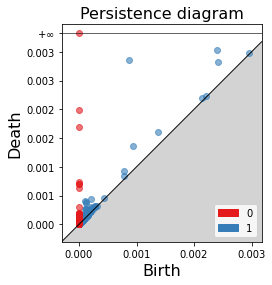

In [45]:
ax = gudhi.plot_persistence_diagram(
    persistence_file=pers_file,
    legend=True)
ax.set_aspect("equal")
plt.show()